# Ejemplos de capas de Keras para el proceso de datos

Vamos a ver el comportamiento de algunas capas de preproceso disponibles en Keras bajo las librerías `layers.preprocessing.experimental` y, directamente `layers`.

Veremos tres capas relacionadas con ejercicios realizados a lo largo del curso.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread

plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize': (16, 9),'figure.dpi': 200})

2021-10-20 10:10:36.439224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-20 10:10:36.439246: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## `TextVectorization`

Convierte cadenas de texto en una representación codificada que, por ejemplo, puede ser leída directamente por una capa de `embedding`. Es **muy potente** debido a la cantidad de configuraciones que se le pueden meter.

In [2]:
sentences = [
    'Augusta Lovelace fue una matemática británica célebre su trabajo acerca de la máquina analítica de Babbage',
    'Grace Hopper fue una científica de la computación que desarrolló el primer compilador para un lenguaje de programación',
]


text_vectorization = tf.keras.layers.TextVectorization()
text_vectorization.adapt(sentences)
text_vectorization(sentences)

2021-10-20 10:10:37.649739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-20 10:10:37.649761: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-20 10:10:37.649778: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vault21): /proc/driver/nvidia/version does not exist
2021-10-20 10:10:37.650014: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-20 10:10:37.785867: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimi

<tf.Tensor: shape=(2, 18), dtype=int64, numpy=
array([[27, 15,  5,  3, 14, 25, 21,  8,  7, 29,  2,  4, 13, 28,  2, 26,
         0,  0],
       [18, 17,  5,  3, 24,  2,  4, 22,  9, 20, 19, 11, 23, 12,  6, 16,
         2, 10]])>

## `NormalizationLayer`

Esta capa se encargará de normalizar todas las entradas a una distribución normal a priori centrada en 0 y con desviación 1, aunque este comportamiento se puede cambiar. Para ello, en ti capa coaccionará sus entradas en una distribución centrada en 0 con desviación estándar 1.

Si no se especifican media y varianza en la entrada, en el momento en el que se llame al método `adapt` se calculará la media y la varianza a partir de la fórmula:

$$(X - \mu) / \sigma$$

In [3]:
adapt_data = np.array([9, 8, 7, -1, -1, -11])
input_data = np.array([1, 2, 3, 4, 5])
print('Normalización sin especificar nada:')
print(tf.keras.layers.Normalization()(input_data).numpy())
print('-'*78)
print('Normalización especificando (media, varianza) como (0, 1)')
print(tf.keras.layers.Normalization(mean=0, variance=1)(input_data).numpy())
print('-'*78)
print('Normalización especificando (media, varianza) como (0, 10)')
print(tf.keras.layers.Normalization(mean=0, variance=10)(input_data).numpy())
print('-'*78)
print('Normalización especificando (media, varianza) como (3, 1)')
print(tf.keras.layers.Normalization(mean=0, variance=10)(input_data).numpy())
print('-'*78)
print(f'Normalización partiendo del conjunto de datos {adapt_data}')
layer = tf.keras.layers.Normalization(axis=None)
layer.adapt(adapt_data)
print(layer(input_data).numpy())

Normalización sin especificar nada:
[1. 2. 3. 4. 5.]
------------------------------------------------------------------------------
Normalización especificando (media, varianza) como (0, 1)
[1. 2. 3. 4. 5.]
------------------------------------------------------------------------------
Normalización especificando (media, varianza) como (0, 10)
[0.31622776 0.6324555  0.94868326 1.264911   1.5811388 ]
------------------------------------------------------------------------------
Normalización especificando (media, varianza) como (3, 1)
[0.31622776 0.6324555  0.94868326 1.264911   1.5811388 ]
------------------------------------------------------------------------------
Normalización partiendo del conjunto de datos [  9   8   7  -1  -1 -11]
[-0.1184781   0.02369561  0.16586933  0.30804303  0.45021674]


## `ResizingLayer`

Redimensiona una imagen de entrada (como tensor de valores numéricos) al ancho y alto especificados. La entrada debe ser en format _channels last_, es decir, o bien un tensor de la forma `(height, width, channels)`, o bien `(examples, height, width, channels)`

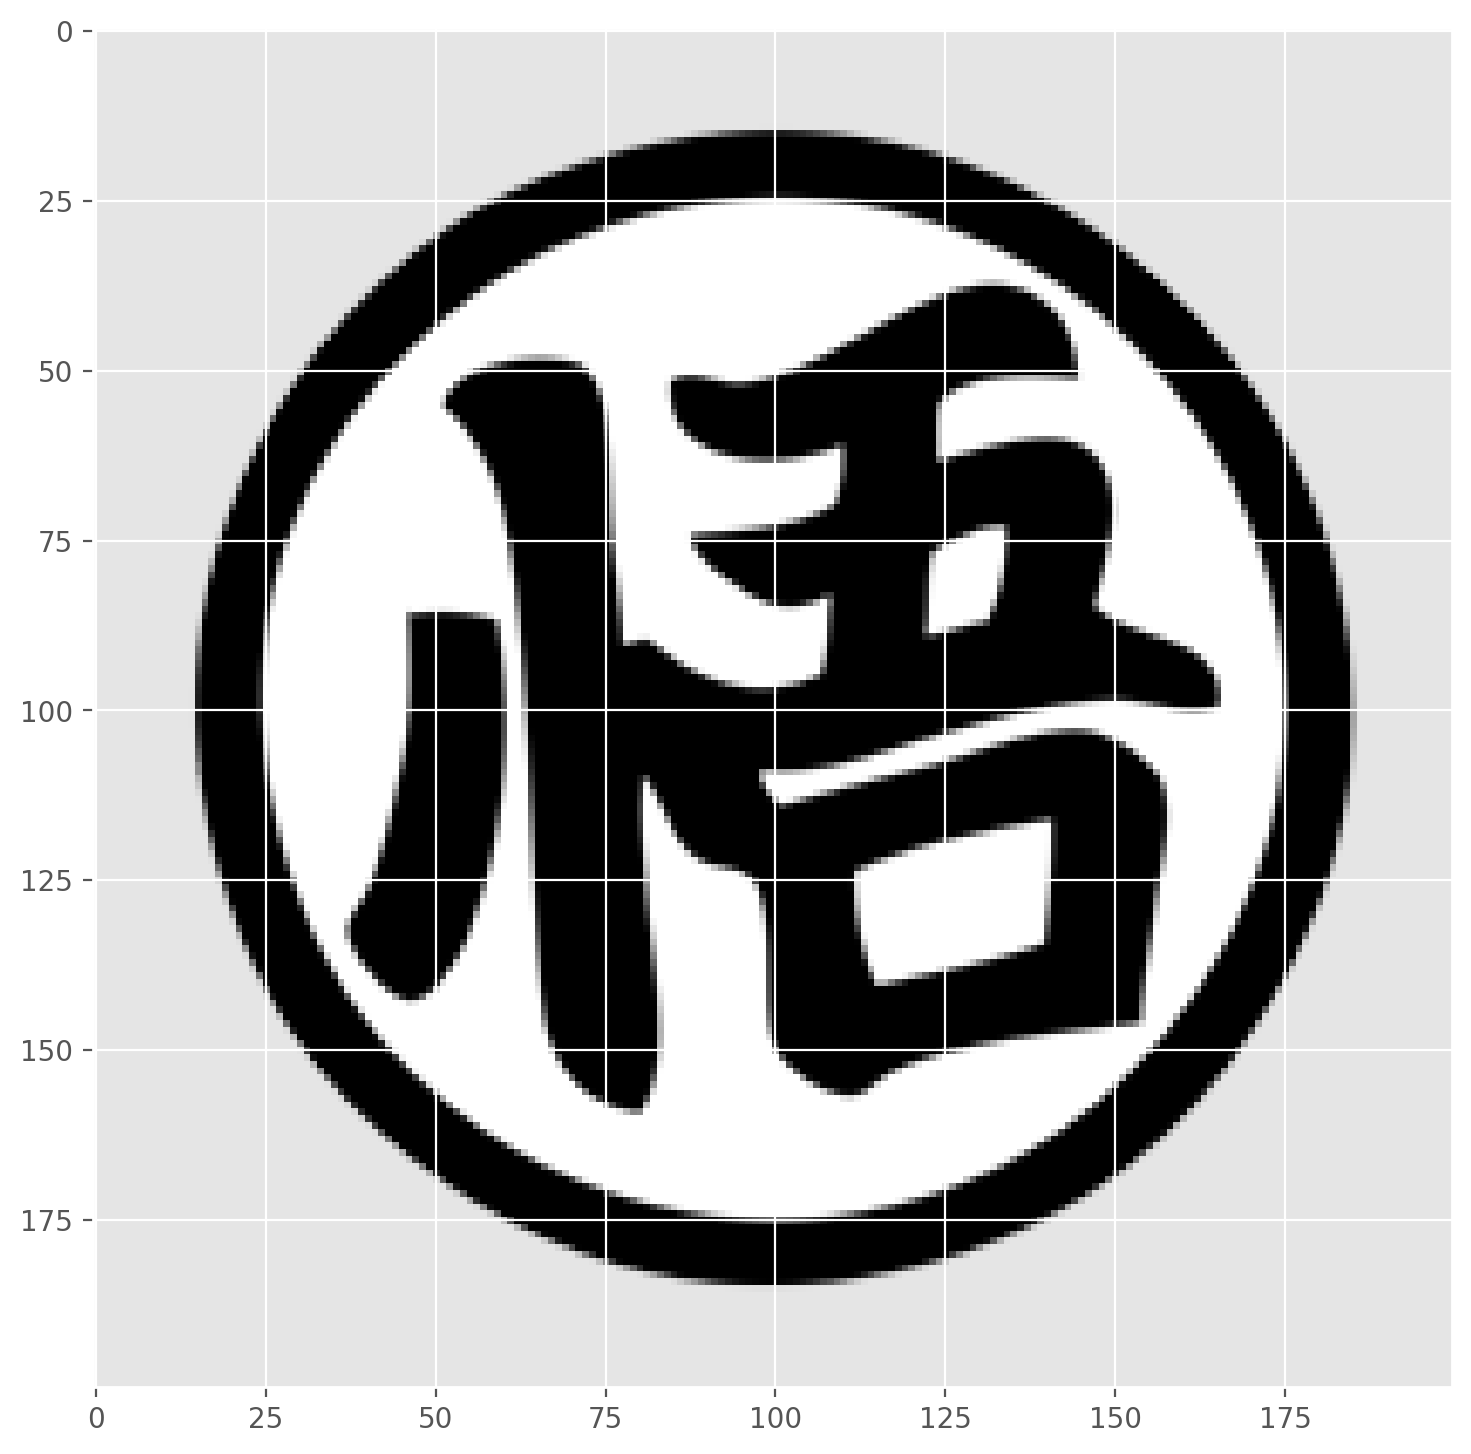

In [4]:
image = imread('image.png')

plt.imshow(image, cmap='hot');

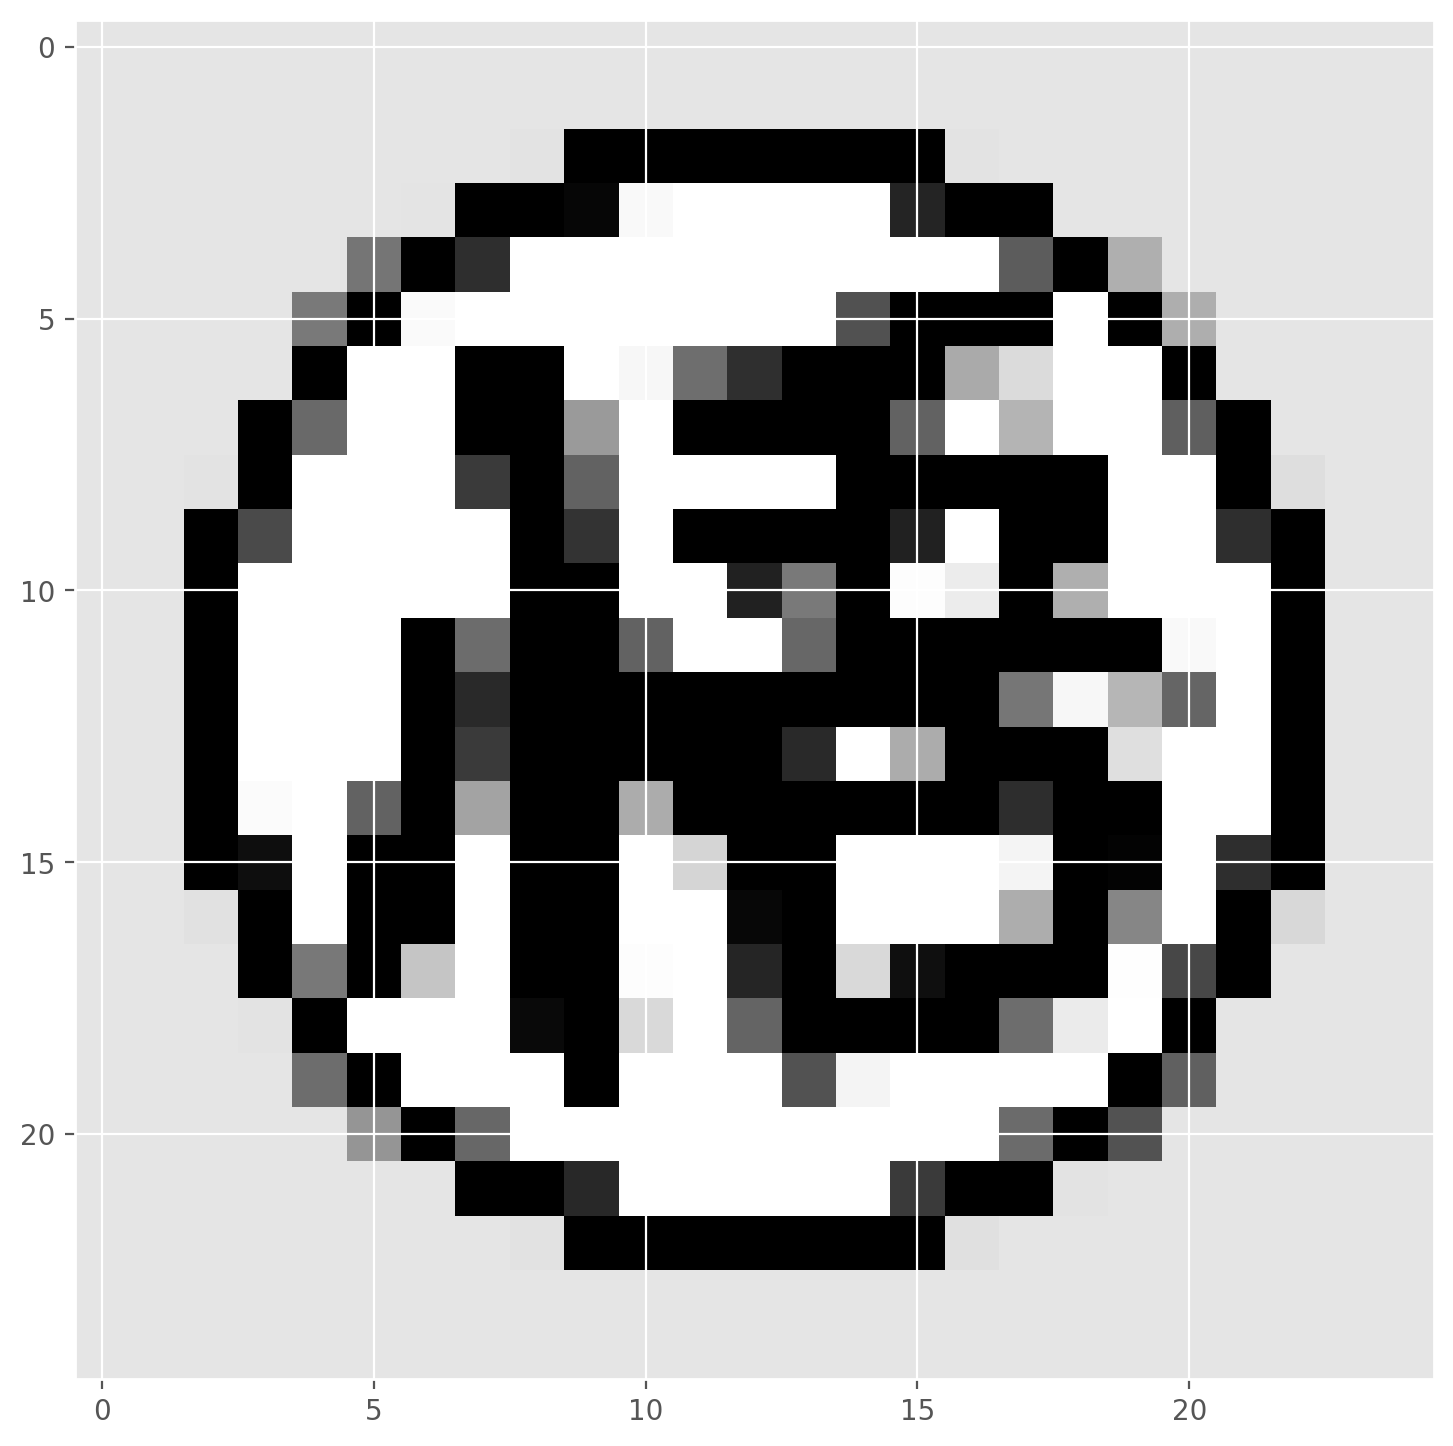

In [5]:
resized_image = tf.keras.layers.Resizing(
    height=25,
    width=25,
    interpolation="bilinear",
    crop_to_aspect_ratio=False,
)(image)
plt.imshow(resized_image, cmap='hot');